# QF600 - Homework 4
*by Julian Chang*
> ## Efficient Frontier Revisited

In [1]:
import pandas as pd
import warnings
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Extract Data
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
df_industries = pd.read_excel('./data/Industry_Portfolios.xlsx', index_col='Date')
df_market = pd.read_excel('./data/Market_Portfolio.xlsx', index_col='Date')
df_risk_factors = pd.read_excel('./data/Risk_Factors.xlsx', index_col='Date')

> ### Part 1: Minimum-Tracking-Error Frontier
> Let market return be the target return. Estimate expected deviation from market return, for the ten industry portfolios:
$$
R_i = \mathbb{E}\left[\tilde{R_i}-\tilde{R_m}\right]
$$


In [2]:
deviations = df_industries.values - df_market['Market'].values[:, np.newaxis]   # R_i - R_m, 
R = np.mean(deviations,                                        # and get mean deviation
            axis=0)
df_mean_deviations = pd.DataFrame(
                                {'Mean Monthly Deviation %': R},
                                index=df_industries.columns    
                                )
df_mean_deviations

,Mean Monthly Deviation %
NoDur,0.154750
Durbl,-0.014750
Manuf,0.264750
Enrgy,0.483083
HiTec,0.018167
Telcm,0.133333
Shops,0.168250
Hlth,0.035750
Utils,0.159083
Other,-0.259000


> Also estimate covariance matrix of return deviations, for the ten industry portfolios:
$$
V_{ij} = \text{Cov}\left[ \left( \tilde{R_i} - \tilde{R_m} \right), \left( \tilde{R_j} - \tilde{R_m} \right) \right]
$$

In [3]:
V = np.cov(deviations,rowvar=False)

df_cov = pd.DataFrame(
                                V,
                                columns=df_industries.columns,    
                                index=df_industries.columns    
                                )



In [4]:
df_cov

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


> Plot the minimum-tracking-error frontier generated by the ten industry portfolios: 

Using the formulas
$$
\begin{align}
\alpha = \mathbf{R'V^{-1}e}; \quad \zeta &= \mathbf{R'V^{-1}R}; \quad \delta = \mathbf{e'V^{-1}e} \notag \\
\sigma_p^2 &= \frac{1}{\delta} + \frac{\delta}{\zeta\delta-\alpha^2}(R_p-R_{mv})^2 \notag \\
\end{align}
$$

where \
R is the mean deviation \
V is the covariance matrix \
e is 1 x n matrix 


In [5]:
R, V

(array([ 0.15475   , -0.01475   ,  0.26475   ,  0.48308333,  0.01816667,
         0.13333333,  0.16825   ,  0.03575   ,  0.15908333, -0.259     ]),
 array([[ 5.43969574, -6.07303523, -1.39619166, -1.20053326, -1.88315088,
          1.53888487,  1.14074116,  3.81513716,  4.27200187, -1.7687384 ],
        [-6.07303523, 26.62890078,  4.90802359, -3.48105498,  1.89157693,
         -1.70762521, -0.35433527, -8.08294641, -9.61749011,  4.38586529],
        [-1.39619166,  4.90802359,  2.9504991 ,  1.66613313,  0.06526676,
         -0.62641597, -1.15459666, -2.28889981, -1.90141158,  0.35890361],
        [-1.20053326, -3.48105498,  1.66613313, 19.27491058, -1.51697245,
         -1.04052465, -3.7104391 , -2.48579603,  4.4543684 , -3.8648258 ],
        [-1.88315088,  1.89157693,  0.06526676, -1.51697245,  5.09874619,
         -0.77329384, -0.24535029, -1.93628433, -2.34283867, -1.40405025],
        [ 1.53888487, -1.70762521, -0.62641597, -1.04052465, -0.77329384,
          4.68256695,  0.46379748

In [6]:
e = np.ones(len(df_industries.columns)).T
alpha = R.T@np.linalg.inv(V)@e
zeta  = R.T@np.linalg.inv(V)@R
delta = e.T@np.linalg.inv(V)@e
R_mv  = alpha/delta
alpha, zeta, delta, R_mv

(2.9321278826305965,
 0.20474497351129936,
 58.5502543763984,
 0.05007882397540081)


> - This graph must have expected (monthly) return deviation on the vertical axis vs (monthly) tracking error on the horizontal axis.
> - This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).
>
> Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier.

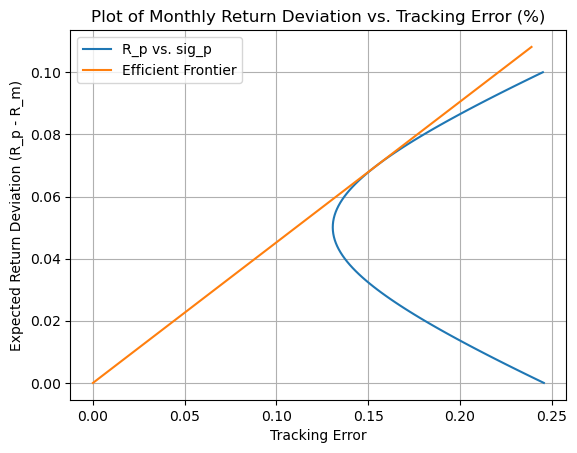

In [7]:
R_deviation = np.arange(0,.101,.001)
sig_p = (1/delta + delta/(zeta*delta-alpha**2)*(R_deviation-R_mv)**2)**.5

R_f = 0
sig_p_mvf = np.arange(0,.24,.001)
R_p_mvf = R_f + (zeta-2*alpha*R_f+delta*R_f**2)**.5*sig_p_mvf

plt.plot(sig_p, R_deviation, label="R_p vs. sig_p")
plt.plot(sig_p_mvf, R_p_mvf, label="Efficient Frontier")
plt.xlabel("Tracking Error")  # X-axis label
# plt.xticks(np.arange(2.5, 5, 0.25))
plt.ylabel("Expected Return Deviation (R_p - R_m)")         # Y-axis label
plt.title("Plot of Monthly Return Deviation vs. Tracking Error (%)")  # Title of the plot
plt.grid(True)
plt.legend()
plt.show()


> Calculate information ratio and portfolio weights for the "tangency" portfolio.


$$ R_{tg} = \frac{\alpha R_f-\zeta}{\delta R_f-\alpha}; \quad \sigma_{tg}=-\frac{(\zeta-2\alpha R_f+\delta R_f^2)^{1/2}}{\delta(R_f-R_{mv})}; \quad \text{Information Ratio} = \frac{R_{tg}-R_f}{\sigma_{tg}}$$


Using the formulas for efficient frontier and taking R_f values as 0

In [8]:
R_tg = (alpha*R_f-zeta)/(delta*R_f-alpha)
sig_tg = -(zeta-2*alpha*R_f+delta*R_f**2)**.5/(delta*(R_f-R_mv))
info_ratio = (R_tg-R_f)/sig_tg

print(f"Information Ratio:\t{info_ratio:.5f}")

Information Ratio:	0.45249


In [9]:
w_star = (delta*R_tg-alpha)/(zeta*delta-alpha**2)*np.linalg.inv(V)@R \
         +(zeta-alpha*R_tg)/(zeta*delta-alpha**2)*np.linalg.inv(V)@e
print(f"tangency portfolio weights")
pd.DataFrame(w_star, df_industries.columns,columns=['Weights'])

tangency portfolio weights


,Weights
NoDur,0.052634
Durbl,0.000153
Manuf,0.137627
Enrgy,0.087032
HiTec,0.179353
Telcm,0.071074
Shops,0.106884
Hlth,0.102776
Utils,0.040162
Other,0.222304


> ### Part 2: Minimum-Variance Frontier w/o Short Sales
>
> Use Monte Carlo method to simulate the minimum-variance frontier without short sales, generated by the ten industry portfolios. Portfolio weights will be limited to the range [0, 1].
>
> Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of portfolio weights, to ensure that the portfolio weights sum to one. This normalised w represents portfolio weights for one simulated portfolio, without short sales.
>
> Use the normalised w along with the vector of mean returns and the covariance matrix of returns (for the ten industry portfolios) to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 10^5 data points.
>
> Plot the data points with mean return on the vertical axis vs standard deviation of return on the horizontal axis.


In [10]:
a = np.random.rand(10)  # get vector of random no.
w = a/a.sum()           # normalise
w.sum()
R_mvf = df_industries.mean().values
V_mvf = df_industries.cov().values
R_i = w@R_mvf.T
sig_i = np.sqrt(w.T@V@w)

In [11]:
# Assuming df_industries is defined and has the necessary data
num_samples = 10**7

# Generate random weights and normalize them
random_weights = np.random.rand(num_samples, 10)  # 10 random weights for each sample
w = random_weights / random_weights.sum(axis=1, keepdims=True)  # Normalize

In [12]:
R_mvf = df_industries.mean().values
V_mvf = df_industries.cov().values

# Compute expected returns and standard deviations
R_i = w @ R_mvf  # Expected returns
sig_i = np.sqrt(np.sum(w @ V_mvf * w, axis=1))  # Standard deviations

In [13]:
sig_i.shape

(10000000,)

In [14]:
last_index = -1  # This refers to the last element

# Expected return for the last element
R_i_last = w[last_index] @ R_mvf

# Standard deviation for the last element
sig_i_last = np.sqrt(w[last_index] @ V_mvf @ w[last_index].T)

# Output the results for the last element
print(f"Expected return for the last sample: {R_i_last}")
print(f"Standard deviation for the last sample: {sig_i_last}")


Expected return for the last sample: 0.836012659231092
Standard deviation for the last sample: 3.9317391366901195


In [15]:
R_i[-1], sig_i[-1]

(0.836012659231092, 3.9317391366901195)

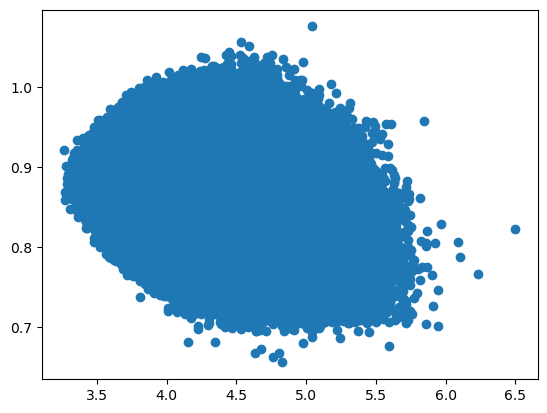

In [16]:
plt.scatter(sig_i,R_i);


> Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.
>
> Plot the new data points (on a separate graph) with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

In [17]:
# Assuming df_industries is defined and has the necessary data
num_samples = 10**7

# Generate random weights and normalize them
random_weights = 1/np.random.rand(num_samples, 10)  # 10 random weights for each sample
w = random_weights / random_weights.sum(axis=1, keepdims=True)  # Normalize
R_mvf = df_industries.mean().values
V_mvf = df_industries.cov().values

# Compute expected returns and standard deviations
R_i = w @ R_mvf  # Expected returns
sig_i = np.sqrt(np.sum(w @ V_mvf * w, axis=1))  # Standard deviations

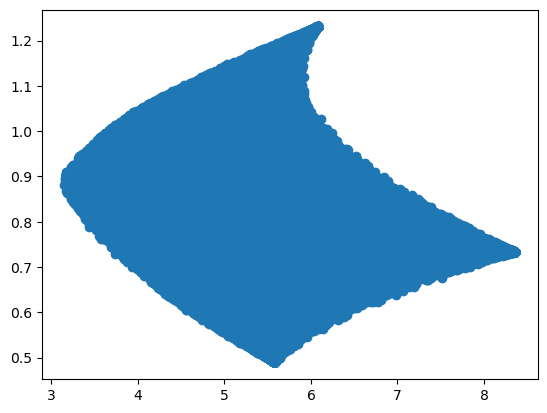

In [18]:
plt.scatter(sig_i,R_i);